In [1]:
import pandas as pd
import numpy as np

In [2]:
retail_fdm = pd.read_csv('../datasets/intermediate/df_online_retail_rfm.csv')

In [3]:
print(retail_fdm.shape)
retail_fdm.head()

(535187, 23)


,invoice_no,stock_code,quantity,invoice_date,unit_price,customer_id,region,normalized_description,day,month,...,invoices_per_customer,avg_sales_per_customer,recency,frequency,monetary,R,F,M,RFM_Score,Segment
0,536365,85123A,6,2019-01-12 08:26:00,2.55,17850.0,United Kingdom,white hang heart tlight holder,12,1,...,309,17.163366,70,35,5303.48,3,4,5,345,Others
1,536365,71053,6,2019-01-12 08:26:00,3.39,17850.0,United Kingdom,white metal lantern,12,1,...,309,17.163366,70,35,5303.48,3,4,5,345,Others
2,536365,84406B,8,2019-01-12 08:26:00,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger,12,1,...,309,17.163366,70,35,5303.48,3,4,5,345,Others
3,536365,84029G,6,2019-01-12 08:26:00,3.39,17850.0,United Kingdom,knit union flag hot water bottle,12,1,...,309,17.163366,70,35,5303.48,3,4,5,345,Others
4,536365,84029E,6,2019-01-12 08:26:00,3.39,17850.0,United Kingdom,red woolly hottie white heart,12,1,...,309,17.163366,70,35,5303.48,3,4,5,345,Others


In [4]:
print(retail_fdm)

       invoice_no stock_code  quantity         invoice_date  unit_price  \
0          536365     85123A         6  2019-01-12 08:26:00        2.55   
1          536365      71053         6  2019-01-12 08:26:00        3.39   
2          536365     84406B         8  2019-01-12 08:26:00        2.75   
3          536365     84029G         6  2019-01-12 08:26:00        3.39   
4          536365     84029E         6  2019-01-12 08:26:00        3.39   
...           ...        ...       ...                  ...         ...   
535182     581587      22613        12  2020-09-12 12:50:00        0.85   
535183     581587      22899         6  2020-09-12 12:50:00        2.10   
535184     581587      23254         4  2020-09-12 12:50:00        4.15   
535185     581587      23255         4  2020-09-12 12:50:00        4.15   
535186     581587      22138         3  2020-09-12 12:50:00        4.95   

       customer_id          region            normalized_description  day  \
0          17850.0  Un

In [5]:
retail_fdm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535187 entries, 0 to 535186
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   invoice_no              535187 non-null  object 
 1   stock_code              535187 non-null  object 
 2   quantity                535187 non-null  int64  
 3   invoice_date            535187 non-null  object 
 4   unit_price              535187 non-null  float64
 5   customer_id             535187 non-null  object 
 6   region                  535187 non-null  object 
 7   normalized_description  535187 non-null  object 
 8   day                     535187 non-null  int64  
 9   month                   535187 non-null  int64  
 10  year                    535187 non-null  int64  
 11  total_sales             535187 non-null  float64
 12  sales_per_customer      535187 non-null  float64
 13  invoices_per_customer   535187 non-null  int64  
 14  avg_sales_per_custom

In [6]:
retail_fdm.describe()

,quantity,unit_price,day,month,year,total_sales,sales_per_customer,invoices_per_customer,avg_sales_per_customer,recency,frequency,monetary,R,F,M,RFM_Score
count,535187.000000,535187.000000,535187.000000,535187.000000,535187.000000,535187.000000,5.351870e+05,535187.000000,535187.000000,535187.000000,535187.000000,5.351870e+05,535187.000000,535187.000000,535187.000000,535187.000000
mean,9.671593,4.645242,15.651716,6.920026,2019.921792,18.173100,3.696333e+05,33840.463044,18.173100,36.373658,580.539012,3.696333e+05,1.826515,3.323550,4.435958,220.322947
std,219.059056,97.364810,8.112763,3.363274,0.268499,381.171824,6.221906e+05,57538.773308,35.671857,65.247504,967.099749,6.221906e+05,1.184647,1.048593,0.996053,111.629178
min,-80995.000000,-11062.060000,1.000000,1.000000,2019.000000,-168469.600000,-4.287630e+03,1.000000,-4287.630000,1.000000,1.000000,-4.287630e+03,1.000000,1.000000,1.000000,111.000000
25%,1.000000,1.250000,10.000000,4.000000,2020.000000,3.750000,1.515730e+03,120.000000,8.912814,1.000000,5.000000,1.515730e+03,1.000000,3.000000,4.000000,145.000000
50%,3.000000,2.080000,15.000000,7.000000,2020.000000,9.900000,4.408540e+03,340.000000,10.835866,13.000000,14.000000,4.408540e+03,1.000000,4.000000,5.000000,145.000000
75%,10.000000,4.130000,22.000000,10.000000,2020.000000,17.400000,2.794890e+05,7812.000000,18.464191,39.000000,248.000000,2.794890e+05,2.000000,4.000000,5.000000,245.000000
max,80995.000000,38970.000000,31.000000,12.000000,2020.000000,168469.600000,1.447488e+06,133583.000000,3861.000000,699.000000,2256.000000,1.447488e+06,5.000000,4.000000,5.000000,544.000000


In [7]:
# Filtramos para excluir los valores de las filas donde el id del consumidor son desconocidos.
retail_fdm_filtered= retail_fdm[retail_fdm['customer_id']!='unknown']

Se decidio que excluiriamos estos datos debido a que no contamos la forma de obtener el id de usuario, ademas que solo representan un pequeño porcentaje con respecto al numero de datos en total. Por lo cual, tomamos la decision de no considerarlos. Por otro lado, pueden sesgar nuestros analisis futuros por clienta ya que contamos valores desconocidos pertenecientes a diferentes regiones.

In [8]:
#Vamos analizar el comportamiento del top 5 de las regiones con mayor número de ventas
top_5_regions = list(retail_fdm_filtered.groupby("region")["total_sales"].sum().sort_values(ascending=False).head(5).index)
print(top_5_regions)

['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France']


Obtenemos el top 5 de paises que tienen mayor numero de ventas que nos permitira analizar el comportamiento de estas regiones donde nuestro negocio esta teniendo exito, para posteriormente poder trasladar estas tendencias a otras regiones.

# VENTAS POR REGION

In [9]:
print(retail_fdm_filtered.groupby("region")["total_sales"].sum().sort_values(ascending=False).head(5))

region
United Kingdom    6747156.154
Netherlands        284661.540
EIRE               250001.780
Germany            221509.470
France             196626.050
Name: total_sales, dtype: float64


<Axes: title={'center': 'Ventas totales por region'}, xlabel='region'>

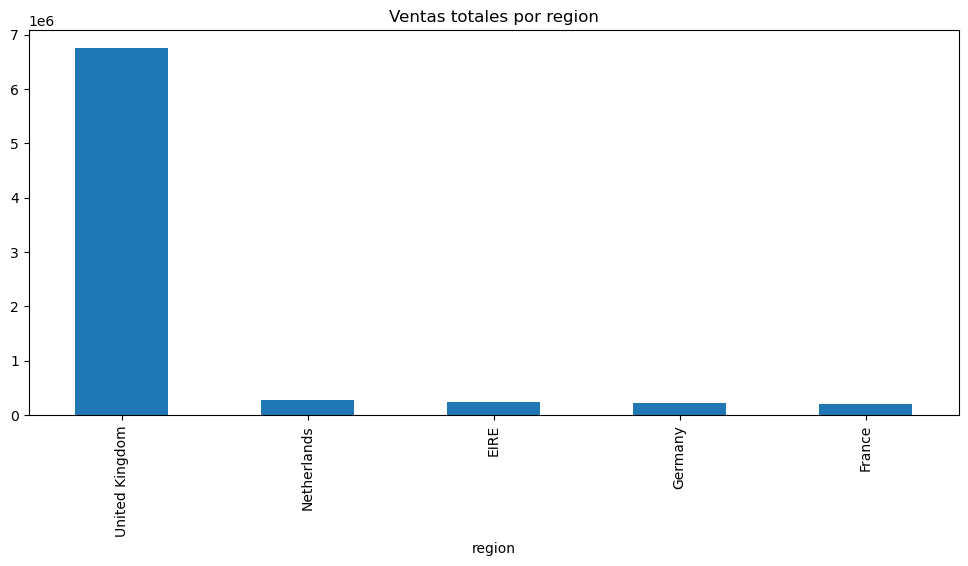

In [10]:
retail_fdm_filtered.groupby("region")["total_sales"].sum().sort_values(ascending=False).head(5).plot(kind='bar', figsize=(12,5), title='Ventas totales por region')

En esta visualización tenemos los valores de ventas agrupados por region, como se puede observar United Kindom es la mayor fuente de ingresos, sin embargo, esto no nos brinda información precisa de que es lo que esta sucediendo, por una parte, puede tratarse que los montos por compra sean mucho mayores, asi que analizaremos más a profundidad los valores promedio de ventas y el número de ventas. Para entender mejor el comportamiento de estas regiones.

Axes(0.125,0.11;0.775x0.77)


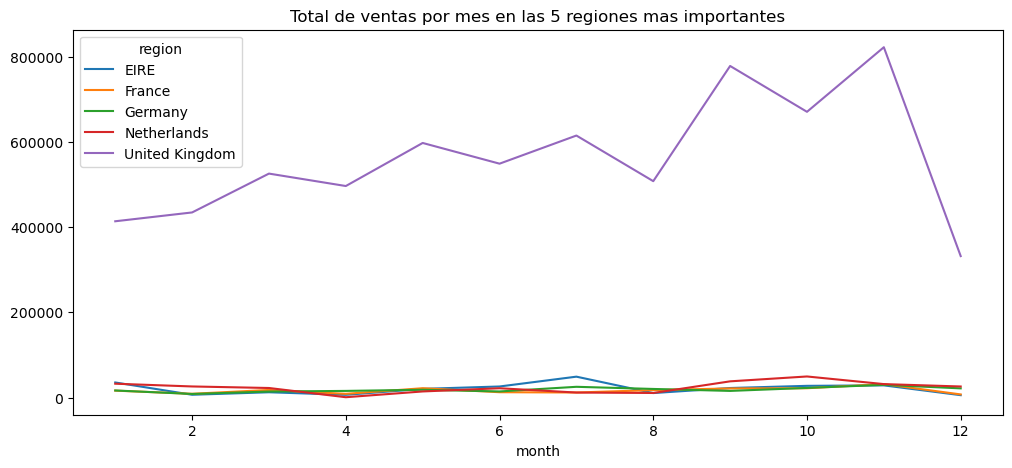

In [11]:

print(
    retail_fdm_filtered[retail_fdm_filtered['region'].isin(top_5_regions)]
    .pivot_table(index= 'month',
                 columns='region',
                 values='total_sales',
                 aggfunc='sum').plot(kind='line', figsize=(12,5), title='Total de ventas por mes en las 5 regiones mas importantes')
)


En este gráfico tenemos la evolución de las ventas totales a través de los meses, lo cual nos arroja que United Kindom tiene el mayor ingreso dentro de los 12 meses.

# CLIENTES POR PROMEDIO DE VENTAS


Axes(0.125,0.11;0.775x0.77)


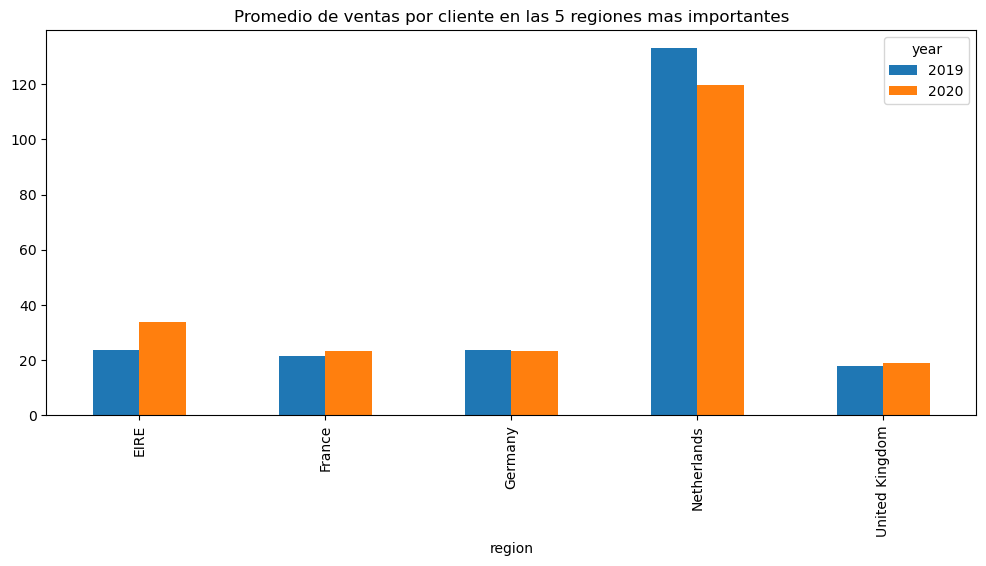

In [12]:
# A partir de los datos filtrados de las 5 regiones se crea una tabla con los valores de ventas
print(
    retail_fdm_filtered[retail_fdm_filtered['region'].isin(top_5_regions)]
    .pivot_table(index= 'region',
                 columns='year',
                 values='avg_sales_per_customer',
                 aggfunc='mean').plot(kind='bar', figsize=(12,5), title='Promedio de ventas por cliente en las 5 regiones mas importantes')
)

En esta visualización se muestran los valores de ventas por clientes agrupados por las 5 regiones principales con mayor ventas totales, en este gráfico podemos observar del lado izquierdo tenemos los resultados del año 2019 comparados con el año consecutivo 2020 podemos decir que el Netherlands representa la region con mayor entradas promedio por cliente. Sin embargo, en el segundo año tuvo una caida, lo indica que debemos reforzar nuestras estrategias para no descuidar las ventas en esta region.

Por otro lado, las ventas en EIRE, Francia y Reino Unido incrementaron con respecto al primer año.


# PROMEDIO DE NUMERO DE COMPRAS POR REGION

In [13]:
print(
    retail_fdm_filtered[retail_fdm_filtered['region'].isin(top_5_regions)]
    .pivot_table(index= 'region',
                 columns='month',
                 values='invoices_per_customer',
                 aggfunc='mean')
)

month                    1            2            3            4   \
region                                                               
EIRE            4953.756917  2238.731449  4888.520140  4760.522388   
France           255.860927   180.351852   279.824383   266.390805   
Germany          189.104459   258.056485   270.012635   229.303216   
Netherlands     1911.438662  2085.000000  1573.303371  2085.000000   
United Kingdom   513.037250   499.033981   529.420749   556.474375   

month                    5            6            7            8   \
region                                                               
EIRE            3968.018927  4077.455859  5269.260327  5164.681909   
France           303.882729   214.588342   245.636364   243.615654   
Germany          254.080283   226.671151   213.596171   248.006818   
Netherlands     1277.974359  1656.146179  1873.924528  2085.000000   
United Kingdom   676.861099   599.370611   527.165142   612.660429   

month             

Axes(0.125,0.11;0.775x0.77)


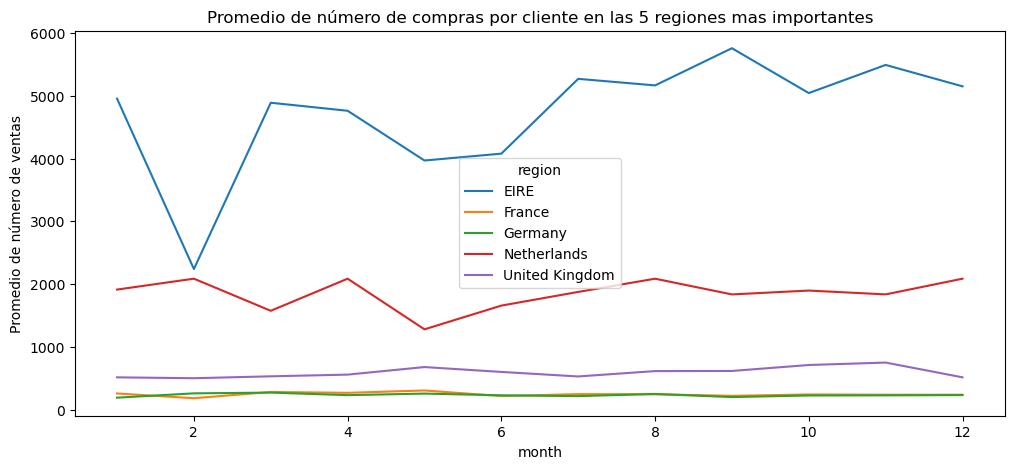

In [14]:
print(
    retail_fdm_filtered[retail_fdm_filtered['region'].isin(top_5_regions)]
    .pivot_table(index= 'month',
                 columns='region',
                 values='invoices_per_customer',
                 aggfunc='mean').plot(kind='line', figsize=(12,5), title='Promedio de número de compras por cliente en las 5 regiones mas importantes',ylabel='Promedio de número de ventas')
)

En esta visualización tenemos los valores del promedio del número de compras por mes agrupadas por region, por un lado tenemos que la región de EIRE representa un mayor promedio de ventas por usuario, esto no significa que tengamos mayores ingresos ya que la region de Netherlands tiene menos numero de compras promedio, sin embargo, el ingreso es mucho mayor. Por otro lado no se detecta una tendencia significativa que represente información relevante, salvo, el mes de febrero en EIRE donde tienen una caida, esta información podria ser utilizada para invertir más en el departamento de marketing para elevar las ventas durante ese mes.

# CTLV

In [15]:
retail_df = pd.read_csv('../datasets/intermediate/df_online_retail_cleaned.csv')
print(retail_df)

       invoice_no stock_code                          description  quantity  \
0          536365     85123A    WHITE HANGING HEART TLIGHT HOLDER         6   
1          536365      71053                  WHITE METAL LANTERN         6   
2          536365     84406B       CREAM CUPID HEARTS COAT HANGER         8   
3          536365     84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4          536365     84029E        RED WOOLLY HOTTIE WHITE HEART         6   
...           ...        ...                                  ...       ...   
535182     581587      22613          PACK OF 20 SPACEBOY NAPKINS        12   
535183     581587      22899           CHILDRENS APRON DOLLY GIRL         6   
535184     581587      23254         CHILDRENS CUTLERY DOLLY GIRL         4   
535185     581587      23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
535186     581587      22138         BAKING SET 9 PIECE RETROSPOT         3   

               invoice_date  unit_price customer_id

In [16]:
#Convertimos la columna invoice date a tipo formato fecha
retail_df['invoice_date']= pd.to_datetime(retail_df['invoice_date'],format= '%Y-%m-%d %H:%M:%S')


In [17]:
# Creamos una columna para el mes
retail_df['month']= retail_df['invoice_date'].dt.to_period('M')

In [18]:
# Creamos una columna del revenue
retail_df['revenue'] = retail_df['quantity']*retail_df['unit_price']

# Se establece el margen del 40%
margin_rate = 0.4


In [19]:

# Obtenemos las primeras invoice
first_invoice = retail_df.groupby('customer_id').agg({'month': 'min'}).reset_index()
first_invoice.columns = ['customer_id', 'first_invoice_month']
first_invoice.head()

,customer_id,first_invoice_month
0,12346.0,2020-01
1,12347.0,2019-07
2,12348.0,2019-12
3,12349.0,2020-11
4,12350.0,2020-02


In [20]:
#Calculamos el tamaño de los cohorts
cohort_sizes = (
    first_invoice.groupby('first_invoice_month')
    .agg({'customer_id': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_invoice_month', 'n_customers']
cohort_sizes.head()

,first_invoice_month,n_customers
0,2019-01,99
1,2019-02,108
2,2019-03,49
3,2019-05,68
4,2019-06,76


In [21]:

# Juntamos las tablas

retail_df = pd.merge(retail_df, first_invoice, on='customer_id')
retail_df.head()


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,normalized_description,month,revenue,first_invoice_month
0,536365,85123A,WHITE HANGING HEART TLIGHT HOLDER,6,2019-01-12 08:26:00,2.55,17850.0,United Kingdom,white hang heart tlight holder,2019-01,15.30,2019-01
1,536365,71053,WHITE METAL LANTERN,6,2019-01-12 08:26:00,3.39,17850.0,United Kingdom,white metal lantern,2019-01,20.34,2019-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2019-01-12 08:26:00,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger,2019-01,22.00,2019-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2019-01-12 08:26:00,3.39,17850.0,United Kingdom,knit union flag hot water bottle,2019-01,20.34,2019-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2019-01-12 08:26:00,3.39,17850.0,United Kingdom,red woolly hottie white heart,2019-01,20.34,2019-01


In [22]:

# Agrupamos por primer mes y mes y lo guardamos como cohorts
cohorts = (
    retail_df.groupby(['first_invoice_month', 'month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts.head()

,first_invoice_month,month,revenue
0,2019-01,2019-01,58451.56
1,2019-01,2019-02,5240.97
2,2019-01,2019-03,26812.19
3,2019-01,2019-05,4545.84
4,2019-01,2019-06,27939.96


In [29]:
# creamos una nueva tabla llamda report
report = pd.merge(cohort_sizes, cohorts, on='first_invoice_month')
report.head()

,first_invoice_month,n_customers,month,revenue
0,2019-01,99,2019-01,58451.56
1,2019-01,99,2019-02,5240.97
2,2019-01,99,2019-03,26812.19
3,2019-01,99,2019-05,4545.84
4,2019-01,99,2019-06,27939.96


In [24]:
# Calcular el gp (gross profit)
report['gp'] = report['revenue'] * margin_rate

# Calcular la edad en meses
report['age'] = (report['month'].dt.year - report['first_invoice_month'].dt.year) * 12 + (report['month'].dt.month - report['first_invoice_month'].dt.month)



In [26]:
# Redondeamos y cambiamos a formato Int
report['age'] = report['age'].round().astype('int')

# Calculamos el ltv
report['ltv'] = report['gp'] / report['n_customers']

output = report.pivot_table(
    index='first_invoice_month', columns='age', values='ltv', aggfunc='mean'
).round()

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
first_invoice_month,,,,,,,,,,,,,,,,,,,,,
2019-01,236.0,21.0,108.0,,18.0,113.0,-25.0,43.0,76.0,116.0,...,546.0,618.0,359.0,565.0,887.0,769.0,665.0,704.0,1560.0,133.0
2019-02,151.0,1.0,,,11.0,16.0,3.0,8.0,45.0,,...,120.0,136.0,206.0,215.0,74.0,124.0,151.0,188.0,39.0,
2019-03,151.0,,2.0,1.0,0.0,-0.0,10.0,,,32.0,...,149.0,327.0,316.0,181.0,113.0,187.0,196.0,62.0,,
2019-05,154.0,14.0,9.0,3.0,5.0,1.0,,72.0,152.0,90.0,...,109.0,125.0,132.0,90.0,186.0,51.0,,,,
2019-06,107.0,1.0,5.0,5.0,2.0,,38.0,71.0,46.0,55.0,...,79.0,96.0,55.0,118.0,8.0,,,,,
2019-07,341.0,9.0,20.0,3.0,,43.0,99.0,101.0,463.0,338.0,...,1092.0,342.0,420.0,32.0,,,,,,
2019-08,139.0,2.0,3.0,,46.0,76.0,58.0,69.0,73.0,95.0,...,122.0,170.0,39.0,,,,,,,
2019-09,122.0,1.0,,32.0,76.0,54.0,65.0,40.0,117.0,55.0,...,74.0,24.0,,,,,,,,
2019-10,153.0,,21.0,116.0,70.0,96.0,115.0,88.0,39.0,76.0,...,28.0,,,,,,,,,
